In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sympy as sp
from sympy.solvers import solve
%matplotlib inline
matplotlib.style.use("seaborn")
import math

In [2]:
at_max = 10
an_max = 6
v_max = 1.5
x_s, x_f = 0, 4

In [3]:
A, om, x, th_0 = sp.symbols("A, om, x, \\theta_0")

In [4]:
trajectory = A * sp.sin(om*x + th_0)
trajectory = trajectory.subs({A: 1, om: 3, th_0: 0.2})
trajectory

sin(3*x + 0.2)

In [5]:
trajectory_1d = sp.diff(trajectory, x)
trajectory_1d

3*cos(3*x + 0.2)

In [6]:
trajectory_2d = sp.diff(trajectory_1d, x)
trajectory_2d

-9*sin(3*x + 0.2)

In [7]:
radius = (sp.sqrt(1+trajectory_1d**2))**3/abs(trajectory_2d)
radius

(9*cos(3*x + 0.2)**2 + 1)**(3/2)/(9*Abs(sin(3*x + 0.2)))

In [8]:
an = v_max**2 / radius
an

20.25*Abs(sin(3*x + 0.2))/(9*cos(3*x + 0.2)**2 + 1)**(3/2)

In [9]:
v = sp.sqrt(an_max * radius)
v

sqrt(6)*sqrt((9*cos(3*x + 0.2)**2 + 1)**(3/2)/Abs(sin(3*x + 0.2)))/3

In [10]:
dx = 10000
X = np.linspace(x_s, x_f, dx)
Yx = np.array([trajectory.subs(x, val) for val in X])

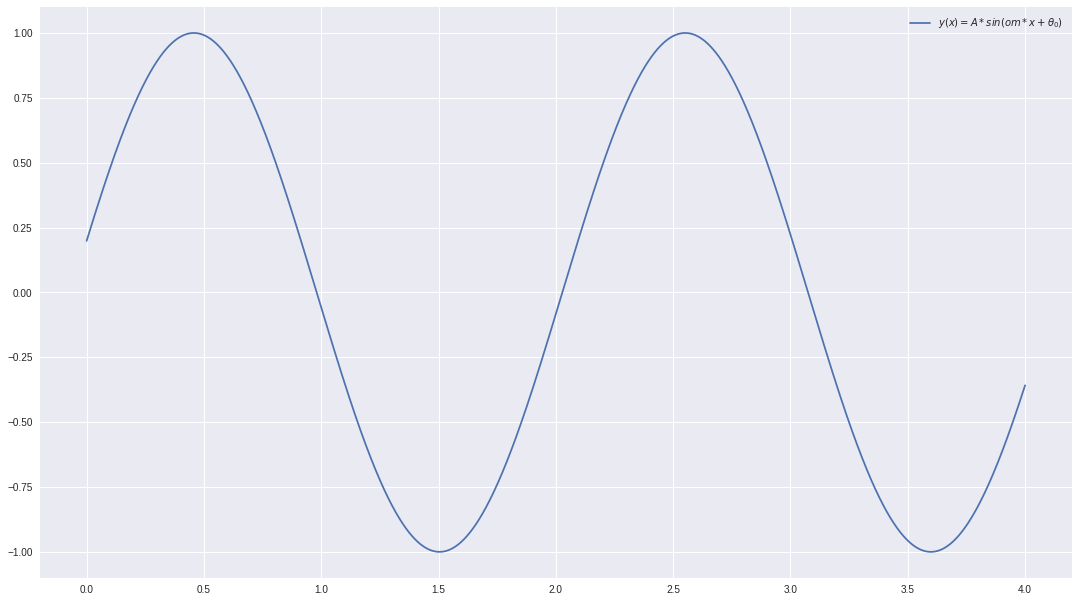

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(X, Yx, label=r"$y(x)=A*sin(om*x+\theta_0)$")
plt.legend()
plt.show()

In [12]:
Vx = np.array([min(v.subs(x, val), v_max) for val in X])

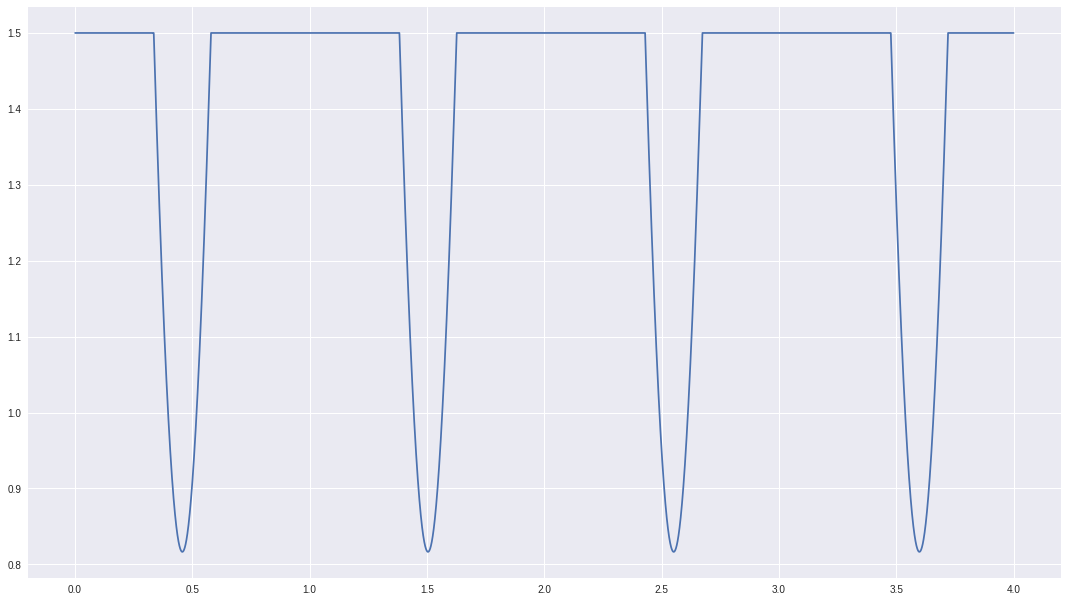

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(X, Vx)
plt.show()

In [14]:
ANx = np.array([min(an.subs(x, val), an_max) for val in X])

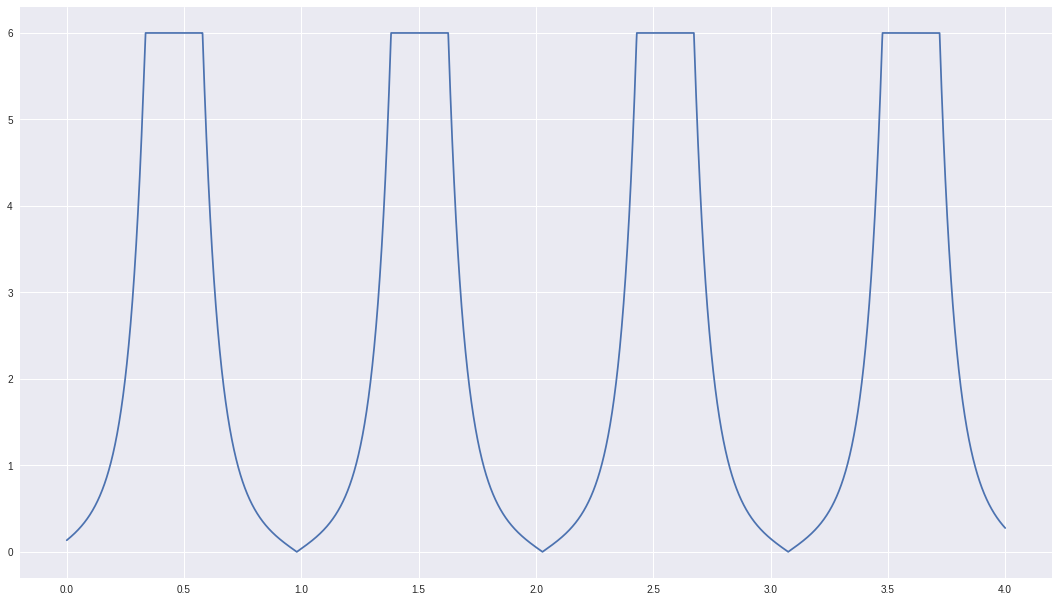

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(X, ANx)
plt.show()

In [16]:
def get_dist(x_arr, y_arr):
    ddy = np.power(y_arr[1:]-y_arr[:-1], 2)
    ddx = np.power(x_arr[1:]-x_arr[:-1], 2)
    ds = np.power(ddy+ddx, 1/2)
    return ds

def timer(x_arr, y_arr, v_arr):
    dv = (v_arr[1:]+v_arr[:-1]) / 2
    ds = get_dist(x_arr, y_arr)
    t_arr = ds / dv
    print(float(np.sum(t_arr)))
    t_list = [0]
    for i, t in enumerate(t_arr):
        t_list.append(t_list[i] + t)
    return t_list

In [17]:
T = timer(X, Yx, Vx)

6.156015045352362


[]

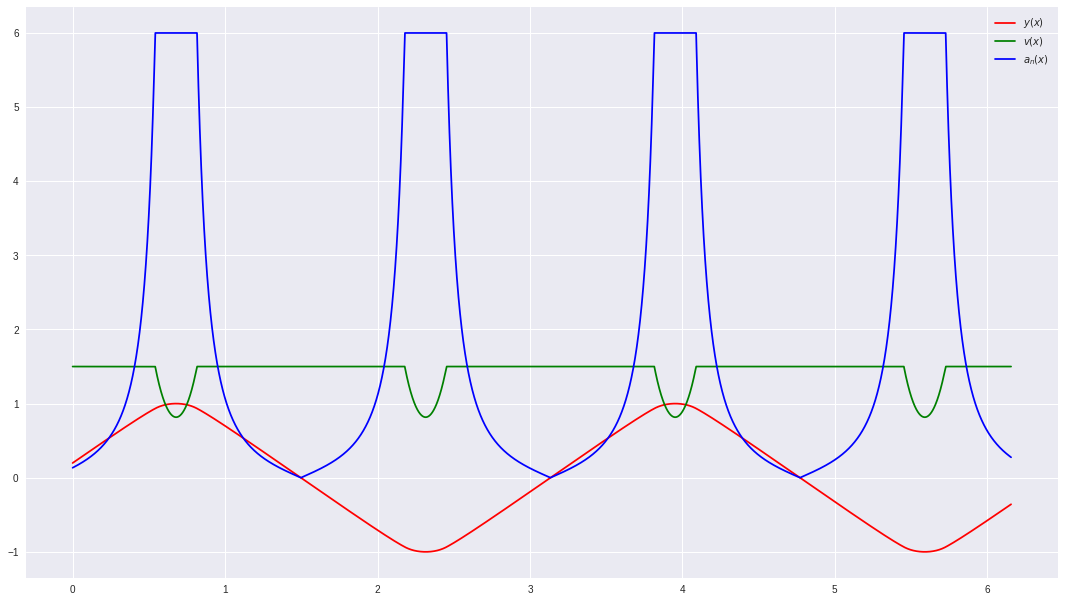

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(T, Yx, "r-", label=r"$y(x)$")
ax.plot(T, Vx, "g-", label=r"$v(x)$")
ax.plot(T, ANx, "b-", label=r"$a_n(x)$")
plt.legend()
plt.plot()

In [19]:
def calculate_velocity(x_arr, y_arr, v_arr):
    ds = get_dist(x_arr, y_arr)
    v_s = [0]
    for i in range(dx - 1):
        v_b = np.power(2*ds[i]*at_max + v_s[i] ** 2,1/2)
        v_s.append(min(v_b, v_arr[i]))
    v_e = [0]
    for i in range(dx-2, -1, -1):
        v_b = np.power(2*ds[::-1][i]*at_max + v_e[0] ** 2,1/2)
        v_e.insert(0, min(v_b, v_arr[i]))
    v_t = []
    for i in range(dx):
        v_t.append(min(v_s[i], v_e[i]))
    return np.array(v_t)

In [20]:
Vt = calculate_velocity(X, Yx, Vx)

[]

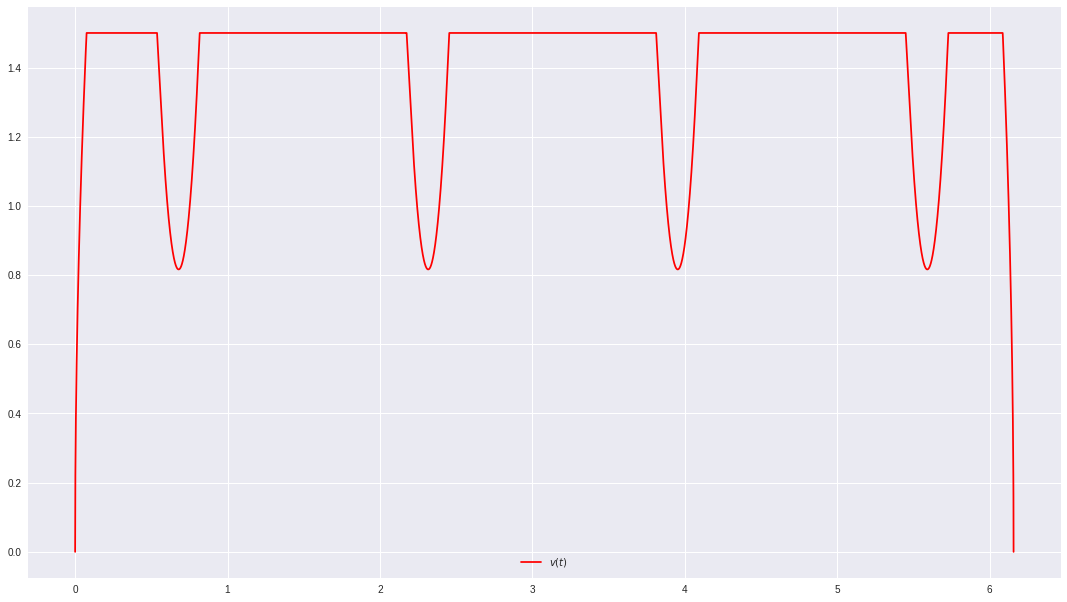

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(T, Vt, "r-", label=r"$v(t)$")
plt.legend()
plt.plot()

In [22]:
def calculate_tangent_acceleration(x_arr, y_arr, v_arr):
    ds = get_dist(x_arr, y_arr)
    atd = (np.power(v_arr[1:], 2) - np.power(v_arr[:-1], 2)) / (2*ds)
    return np.insert(atd, 0, 0)

In [23]:
ATt = calculate_tangent_acceleration(X, Yx, Vt)

[]

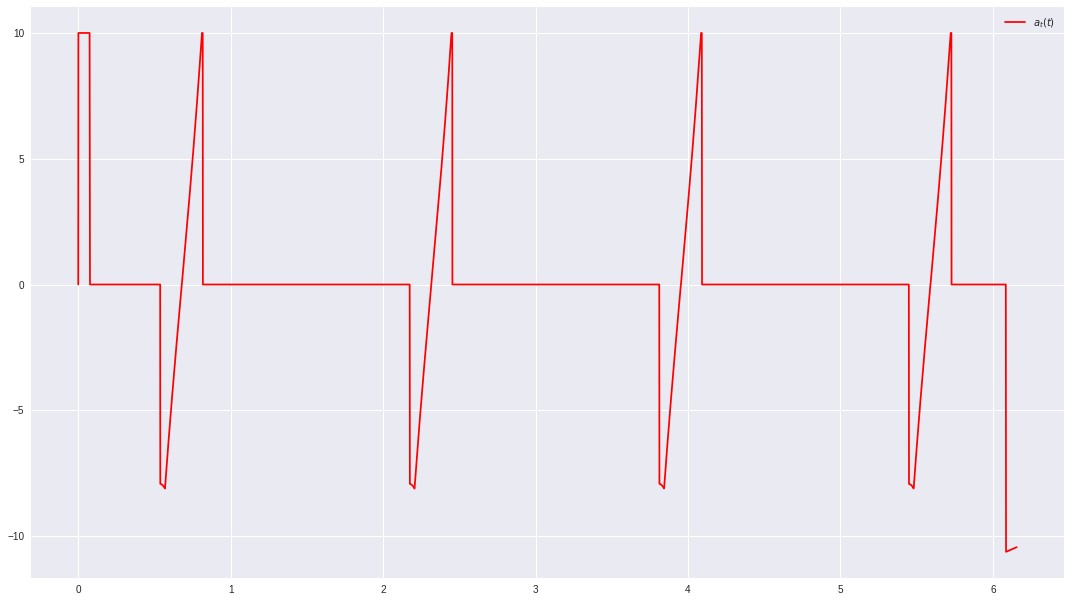

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(T, ATt, "r-", label=r"$a_t(t)$")
plt.legend()
plt.plot()

In [25]:
T0 = timer(X, Yx, Vt)

6.304770049682114


In [26]:
T0

[0,
 0.0157621699521142,
 0.0222898520320580,
 0.0272978787965258,
 0.0315191327925562,
 0.0352375058735746,
 0.0385986027266016,
 0.0416889235881491,
 0.0445648309090371,
 0.0472654760462067,
 0.0498193661863349,
 0.0522480229248905,
 0.0545681671365952,
 0.0567930966253678,
 0.0589335936495587,
 0.0609985446970348,
 0.0629953767396852,
 0.0649303723151354,
 0.0668089021969815,
 0.0686356005614286,
 0.0704144991218785,
 0.0721491314013462,
 0.0738426148875203,
 0.0754977165477396,
 0.0771169056468068,
 0.0787023967517674,
 0.0802561850640964,
 0.0817800756889142,
 0.0832757080663671,
 0.0847445765080552,
 0.0861880475716113,
 0.0876073748488321,
 0.0890037116229604,
 0.0903781217587985,
 0.0917315891181798,
 0.0930650257377591,
 0.0943792789623557,
 0.0956751376924092,
 0.0969533378764214,
 0.0982145673570008,
 0.0994594701611326,
 0.100688650310651,
 0.101902675216910,
 0.103102078713809,
 0.104287363775168,
 0.105459004955711,
 0.106617450589248,
 0.107763124772956,
 0.1088964291626

[]

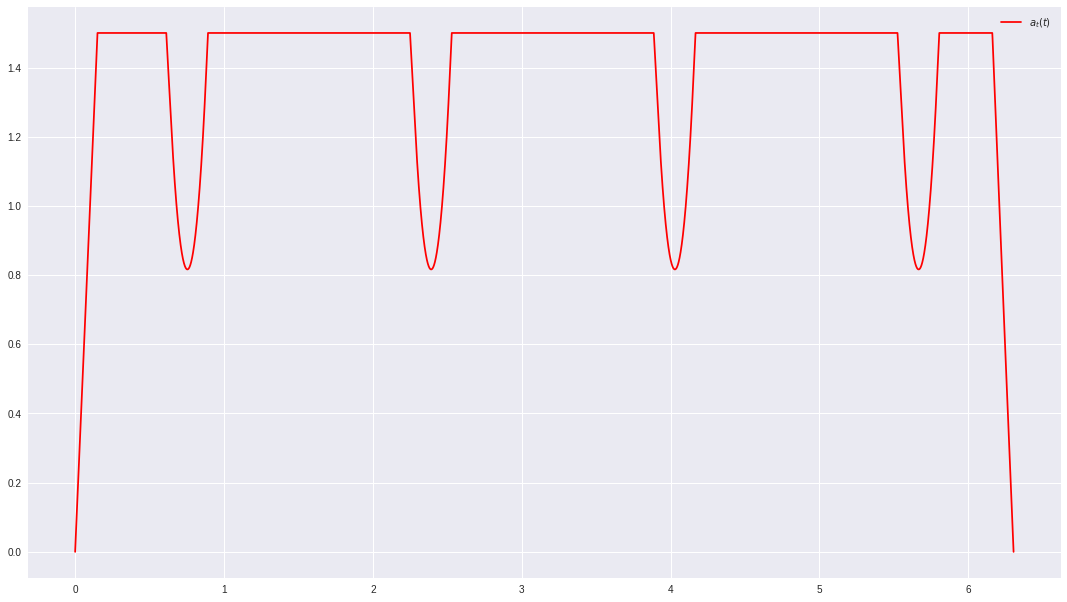

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(T0, Vt, "r-", label=r"$a_t(t)$")
plt.legend()
plt.plot()